# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

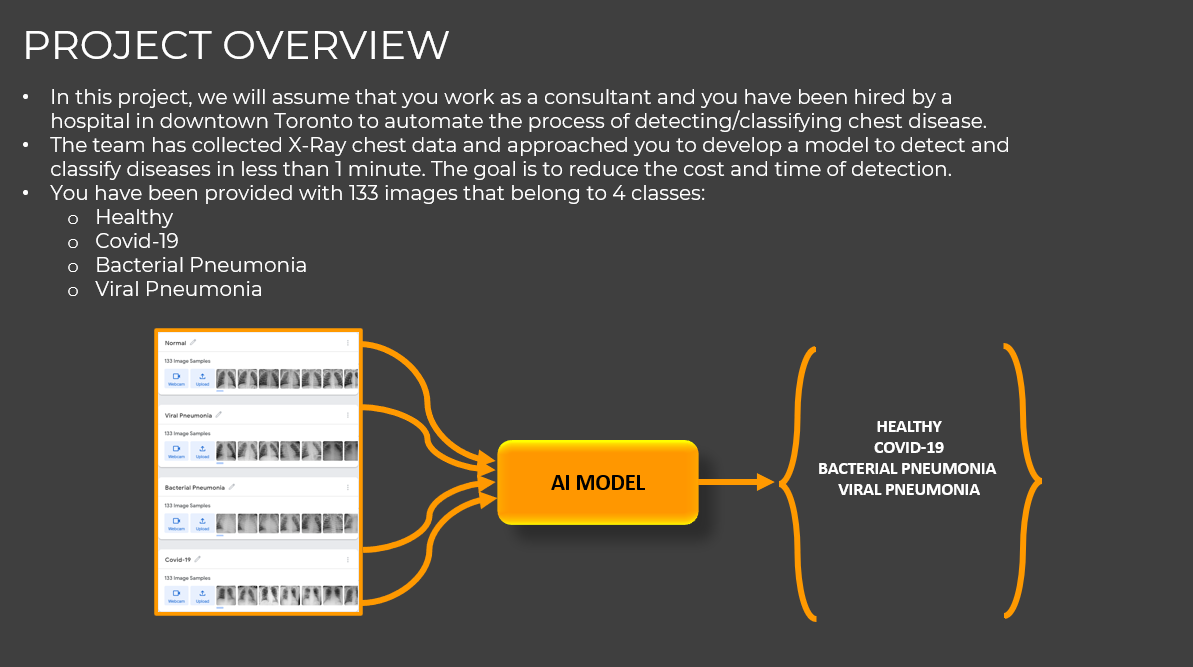

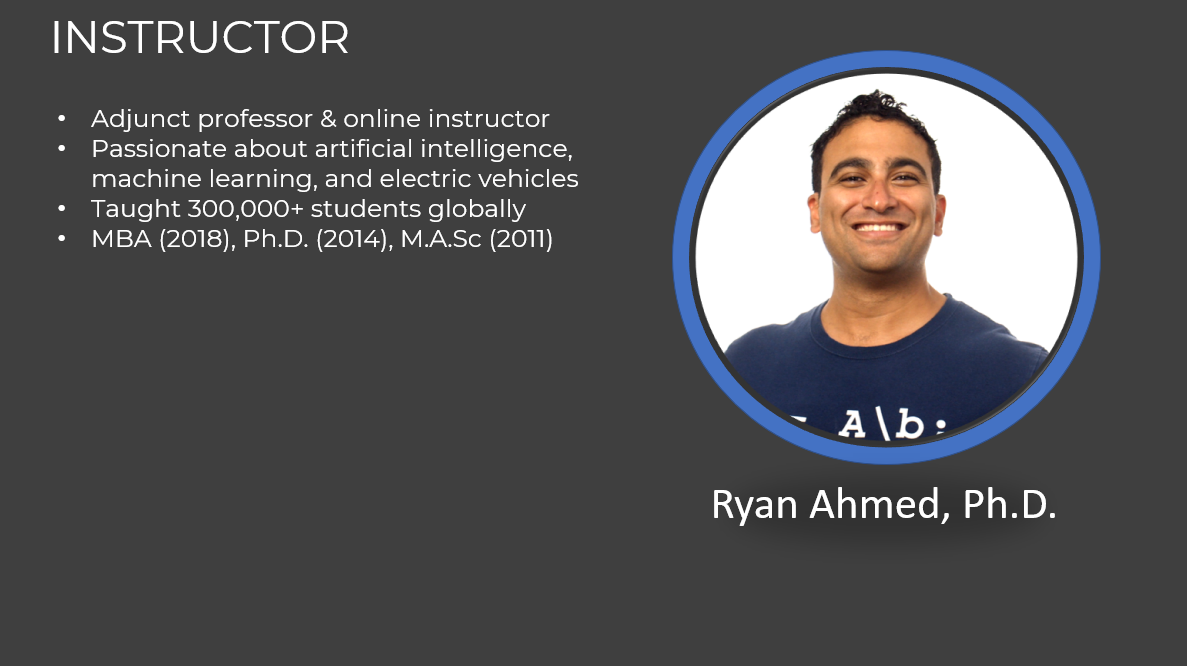

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cv2


In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

  Using cached numpy-1.16.6-cp37-cp37m-win_amd64.whl (11.9 MB)
  Using cached requests-2.18.4-py2.py3-none-any.whl (88 kB)
  Using cached urllib3-1.22-py2.py3-none-any.whl (132 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.11
    Uninstalling urllib3-1.26.11:
      Successfully uninstalled urllib3-1.26.11
  Attempting uninstall: requests
    Found existing installation: requests 2.28.1
    Uninstalling requests-2.28.1:
      Successfully uninstalled requests-2.28.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\administrator\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\~umpy\\.libs\\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



     --------------------------------------- 14.0/14.0 MB 59.8 MB/s eta 0:00:00
     ---------------------------------------- 9.0/9.0 MB 72.1 MB/s eta 0:00:00
     ---------------------------------------- 9.0/9.0 MB 63.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of bcrypt to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of attrs to determine which version is compatible with other requirements. This could take a while.
     ---------------------------------------- 58.8/58.8 kB ? eta 0:00:00
INFO: pip is looking at multiple versions of atomicwrites to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
INFO: pip is looking at multiple versions of requests to determine which version is compatible with other requirements. This could take a while.
     ---

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.1.0 requires scipy==1.4.1; python_version >= "3", but you have scipy 1.6.3 which is incompatible.
mxnet 1.7.0.post2 requires numpy<1.17.0,>=1.8.2, but you have numpy 1.21.6 which is incompatible.
mxnet 1.7.0.post2 requires requests<2.19.0,>=2.18.4, but you have requests 2.28.1 which is incompatible.


In [4]:
# AutoGluon automatically infers how many classes there are based on the directory structure. 
# By default, AutoGluon automatically constructs the training/validation set split:
# Note that the validation dataset is data reserved for tuning processes such as early stopping and hyperparameter tuning.
# This dataset should be in the same format as train_data.

from autogluon.vision import ImagePredictor, ImageDataset
training_data = ImageDataset.from_folder('./Lung_Disease_AI/train')
training_data

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\gluoncv\__init__.py:40: UserWarning: Both `mxnet==1.7.0` and `torch==1.10.2+cpu` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


,image,label
0,C:\Users\Administrator\Desktop\Notebook\Lung_D...,0
1,C:\Users\Administrator\Desktop\Notebook\Lung_D...,0
2,C:\Users\Administrator\Desktop\Notebook\Lung_D...,0
3,C:\Users\Administrator\Desktop\Notebook\Lung_D...,0
4,C:\Users\Administrator\Desktop\Notebook\Lung_D...,0
...,...,...
527,C:\Users\Administrator\Desktop\Notebook\Lung_D...,3
528,C:\Users\Administrator\Desktop\Notebook\Lung_D...,3
529,C:\Users\Administrator\Desktop\Notebook\Lung_D...,3
530,C:\Users\Administrator\Desktop\Notebook\Lung_D...,3


# TASK #3: VISUALIZE DATASET

In [5]:
training_data['image'][0]

'C:\\Users\\Administrator\\Desktop\\Notebook\\Lung_Disease_AI\\train\\Bacterial Pneumonia\\Bacterial (1).jpeg'

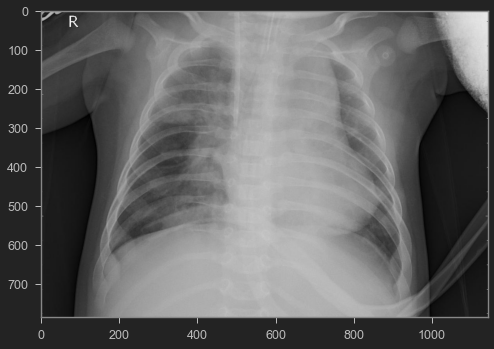

In [6]:
plt.imshow(cv2.imread(training_data['image'][1]))

In [7]:
import random
i = random.randint(0, len(training_data))
i

460

In [8]:
len(training_data) 

532

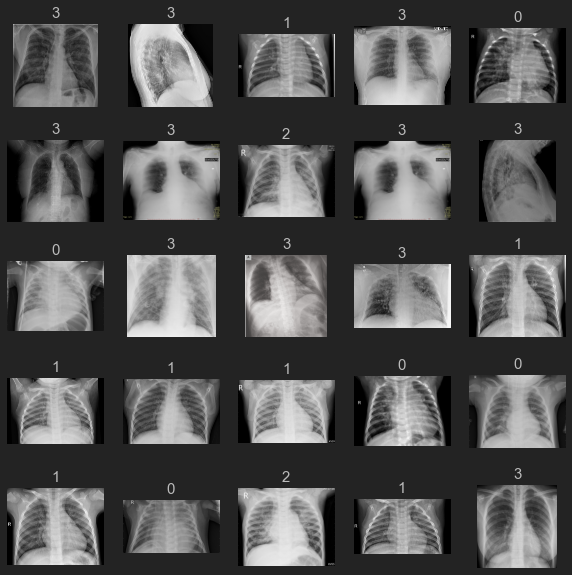

In [9]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array


n_training = len(training_data) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow(cv2.imread(training_data['image'][index]))
    axes[i].set_title(training_data['label'][index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)



**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
- **Create a grid containing 10x10 images** 

# TASK #4: UNDERSTAND AWS AUTOGLUON FUNDAMENTALS

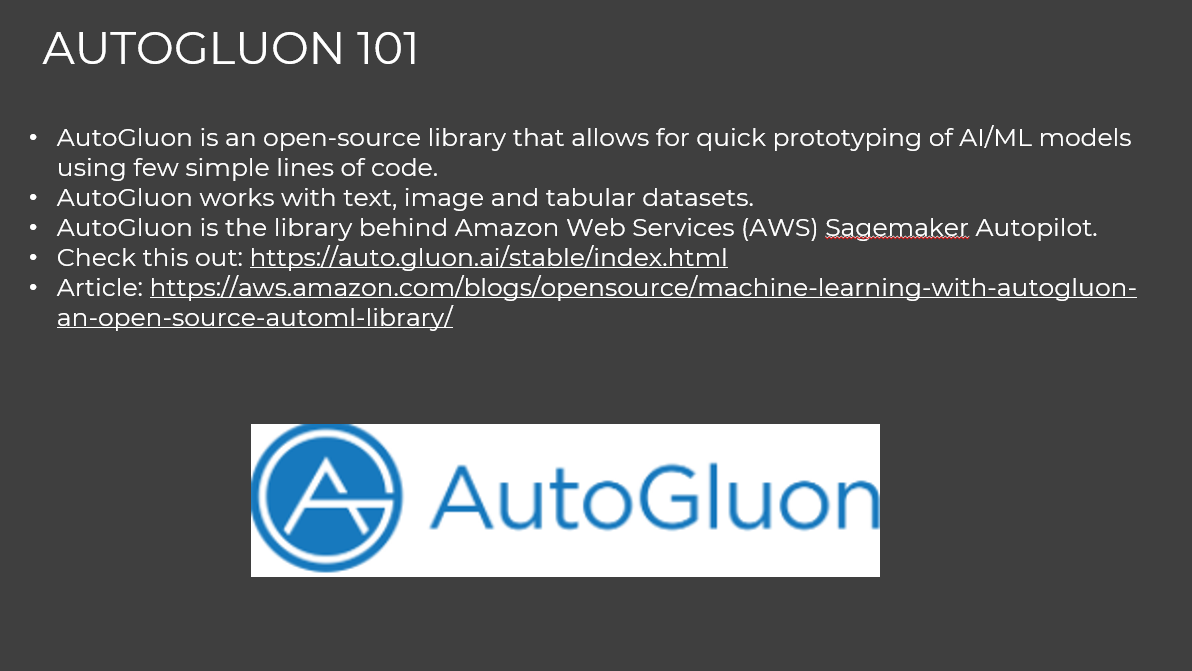

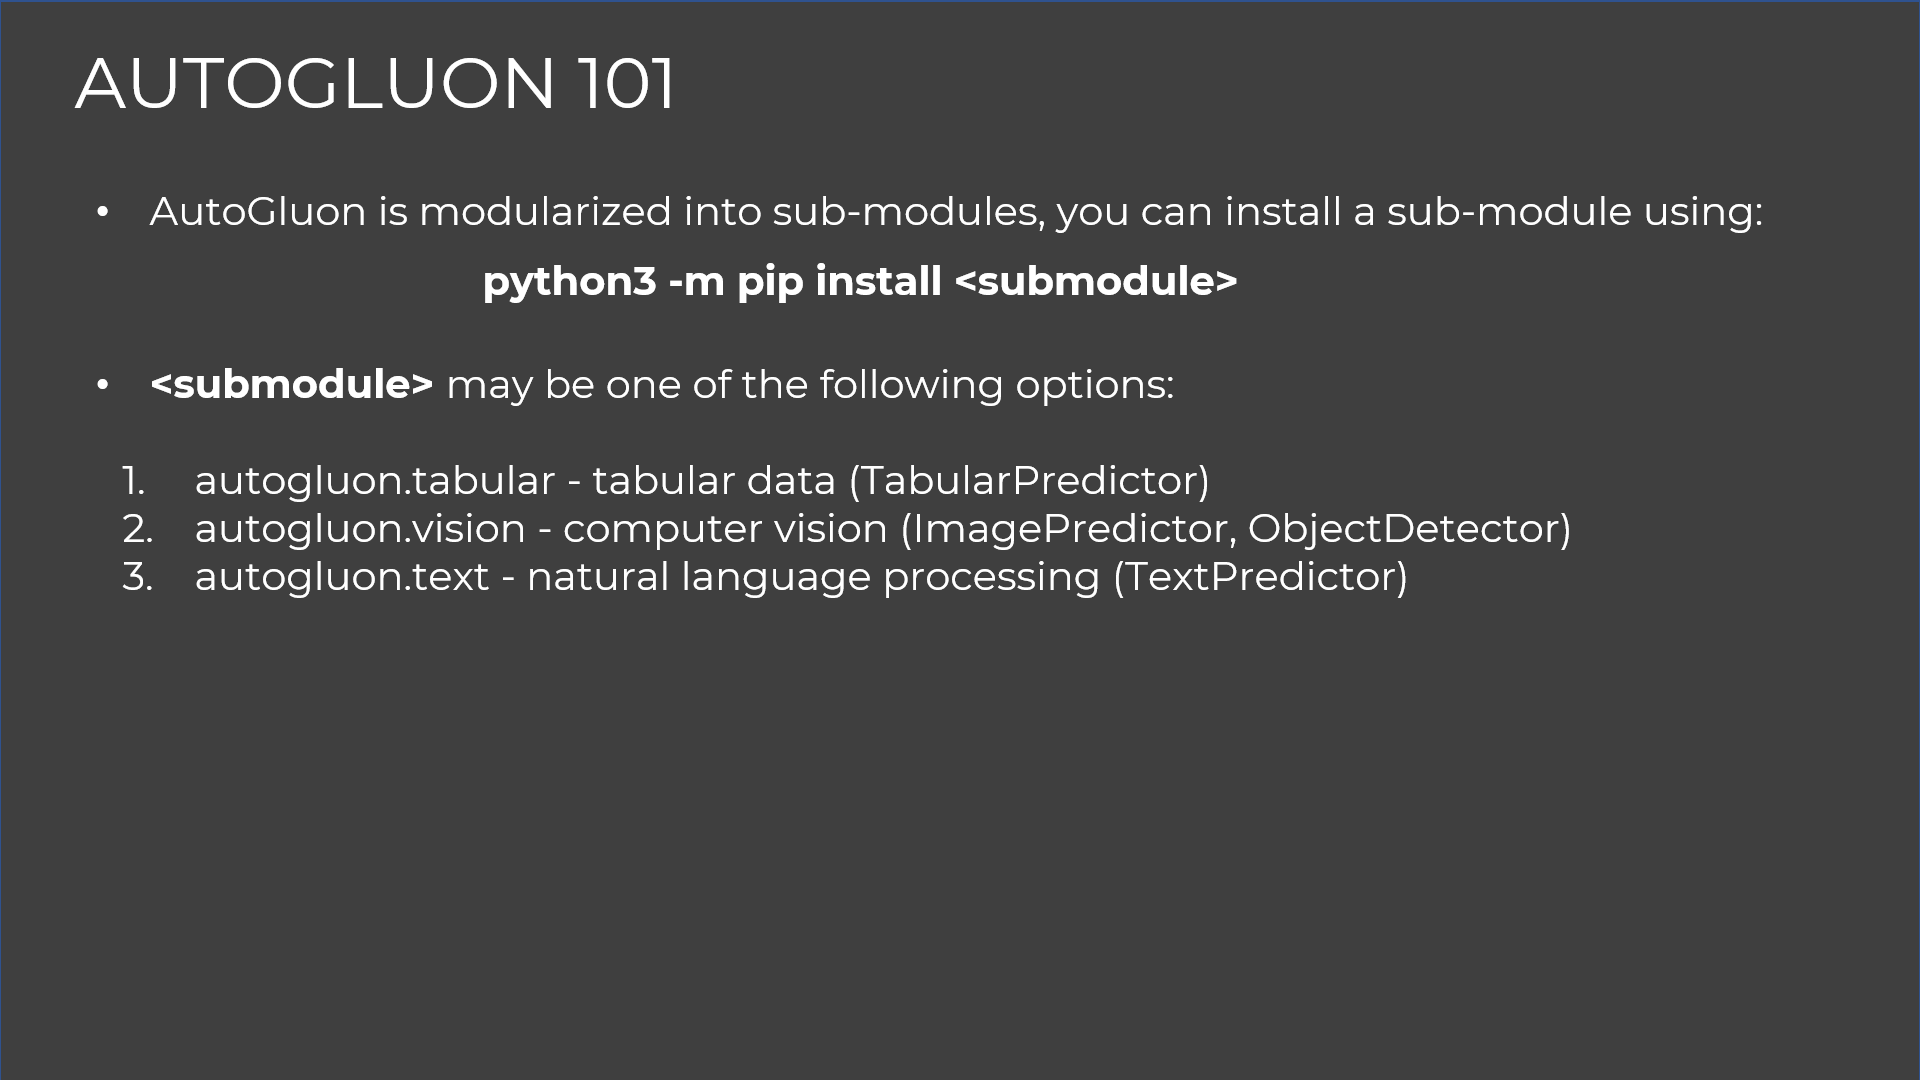

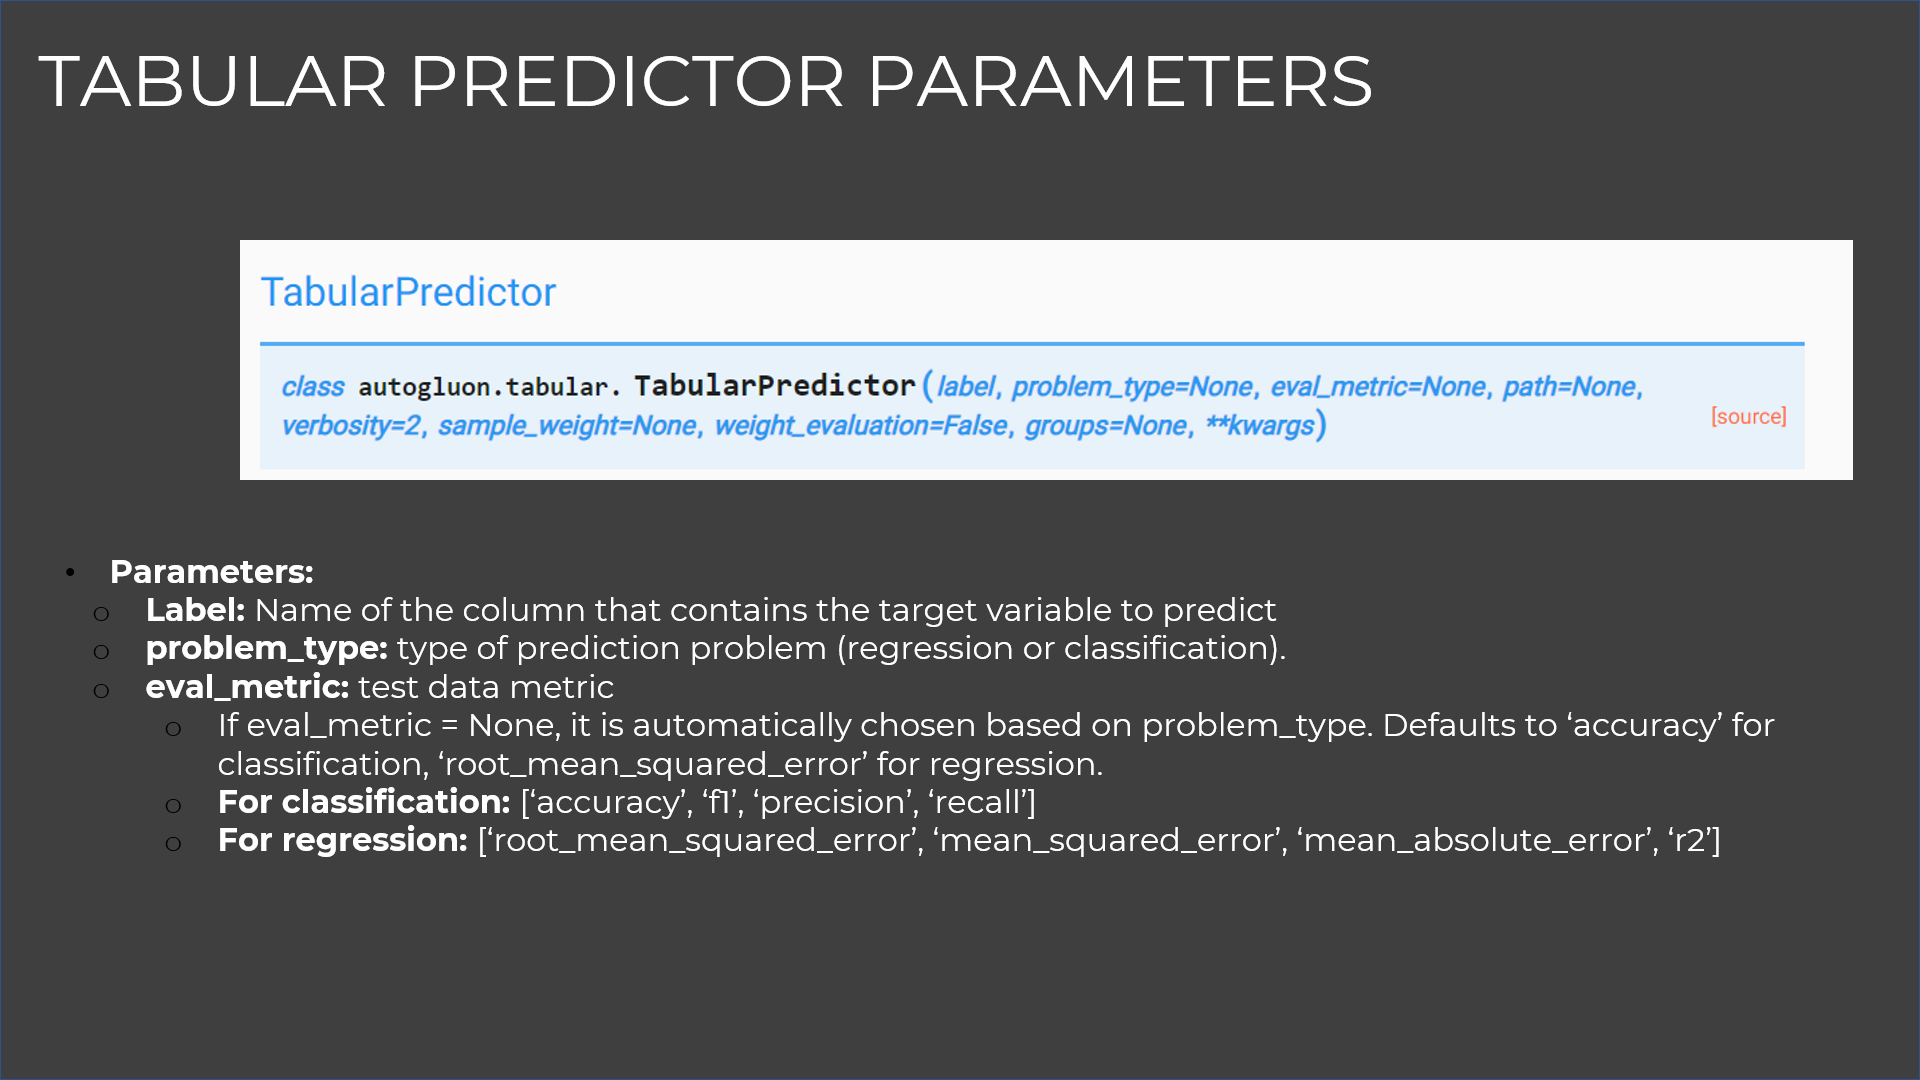

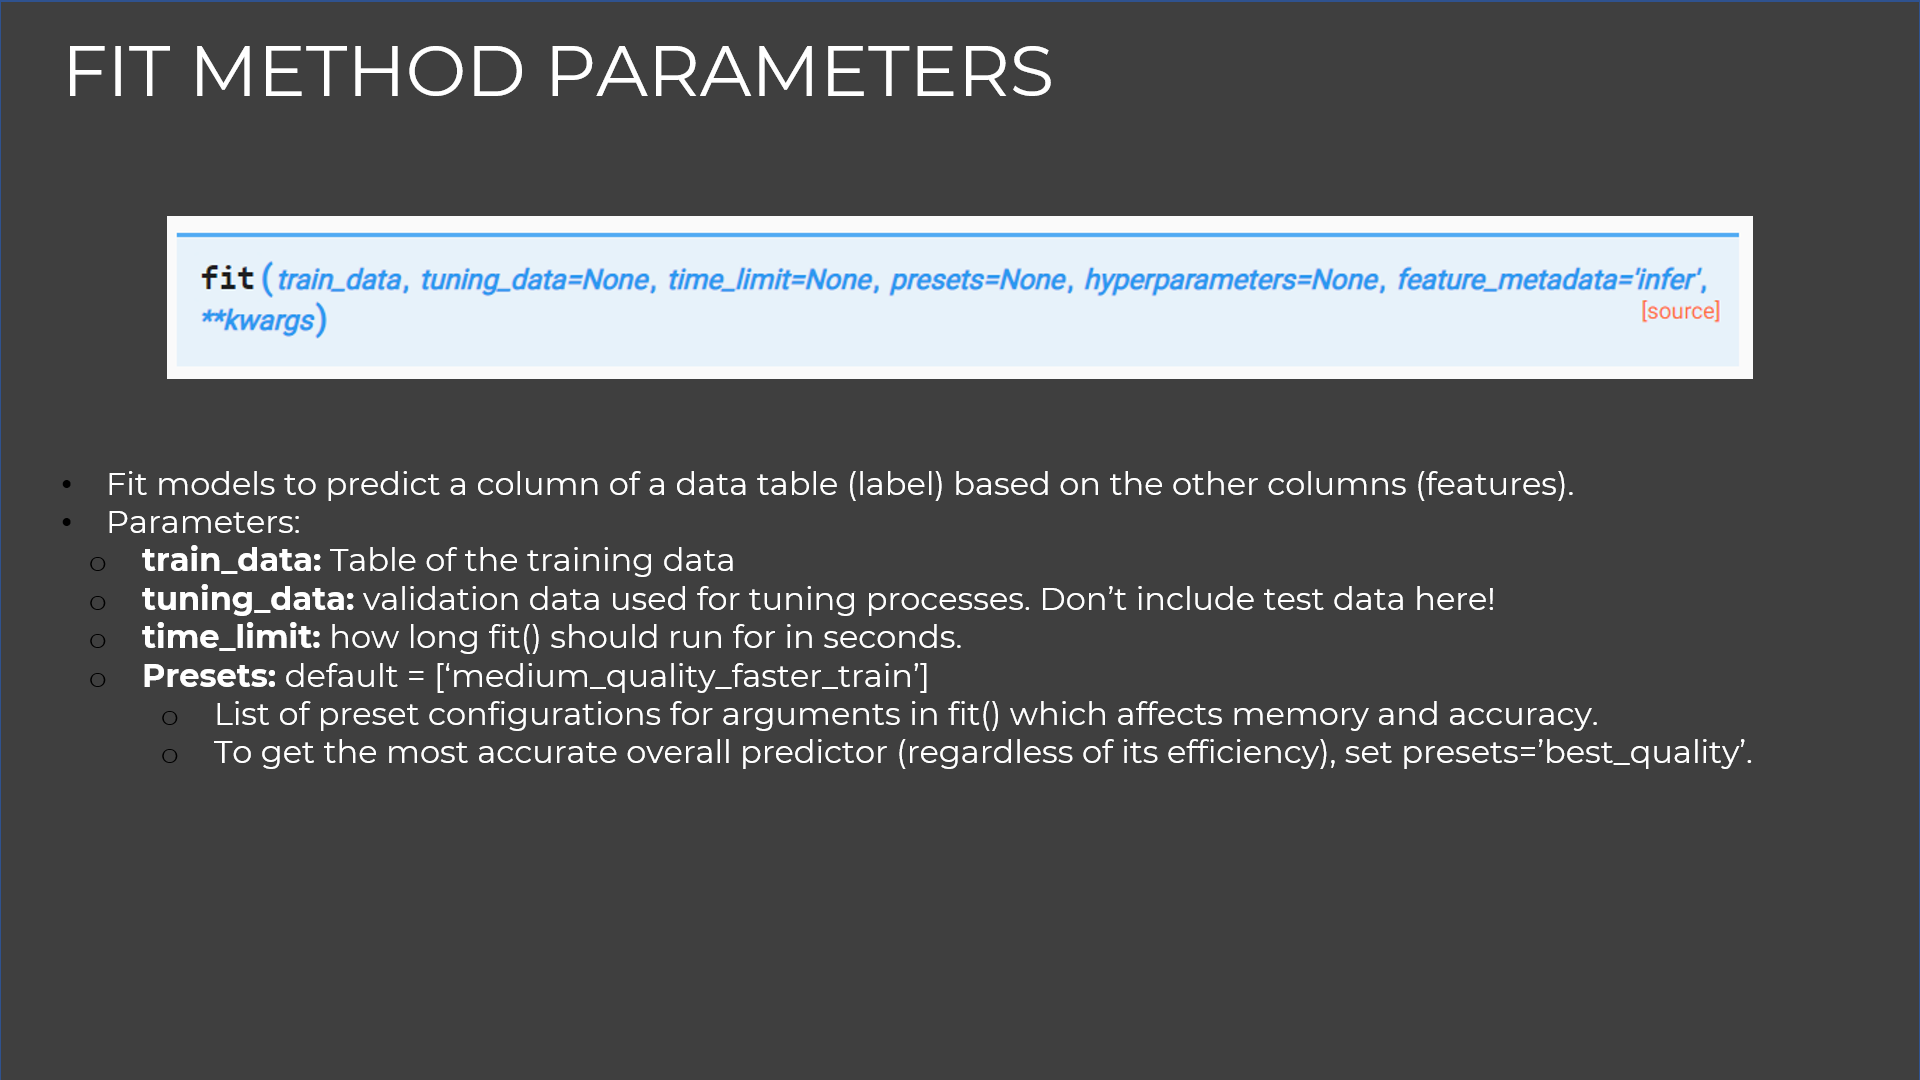

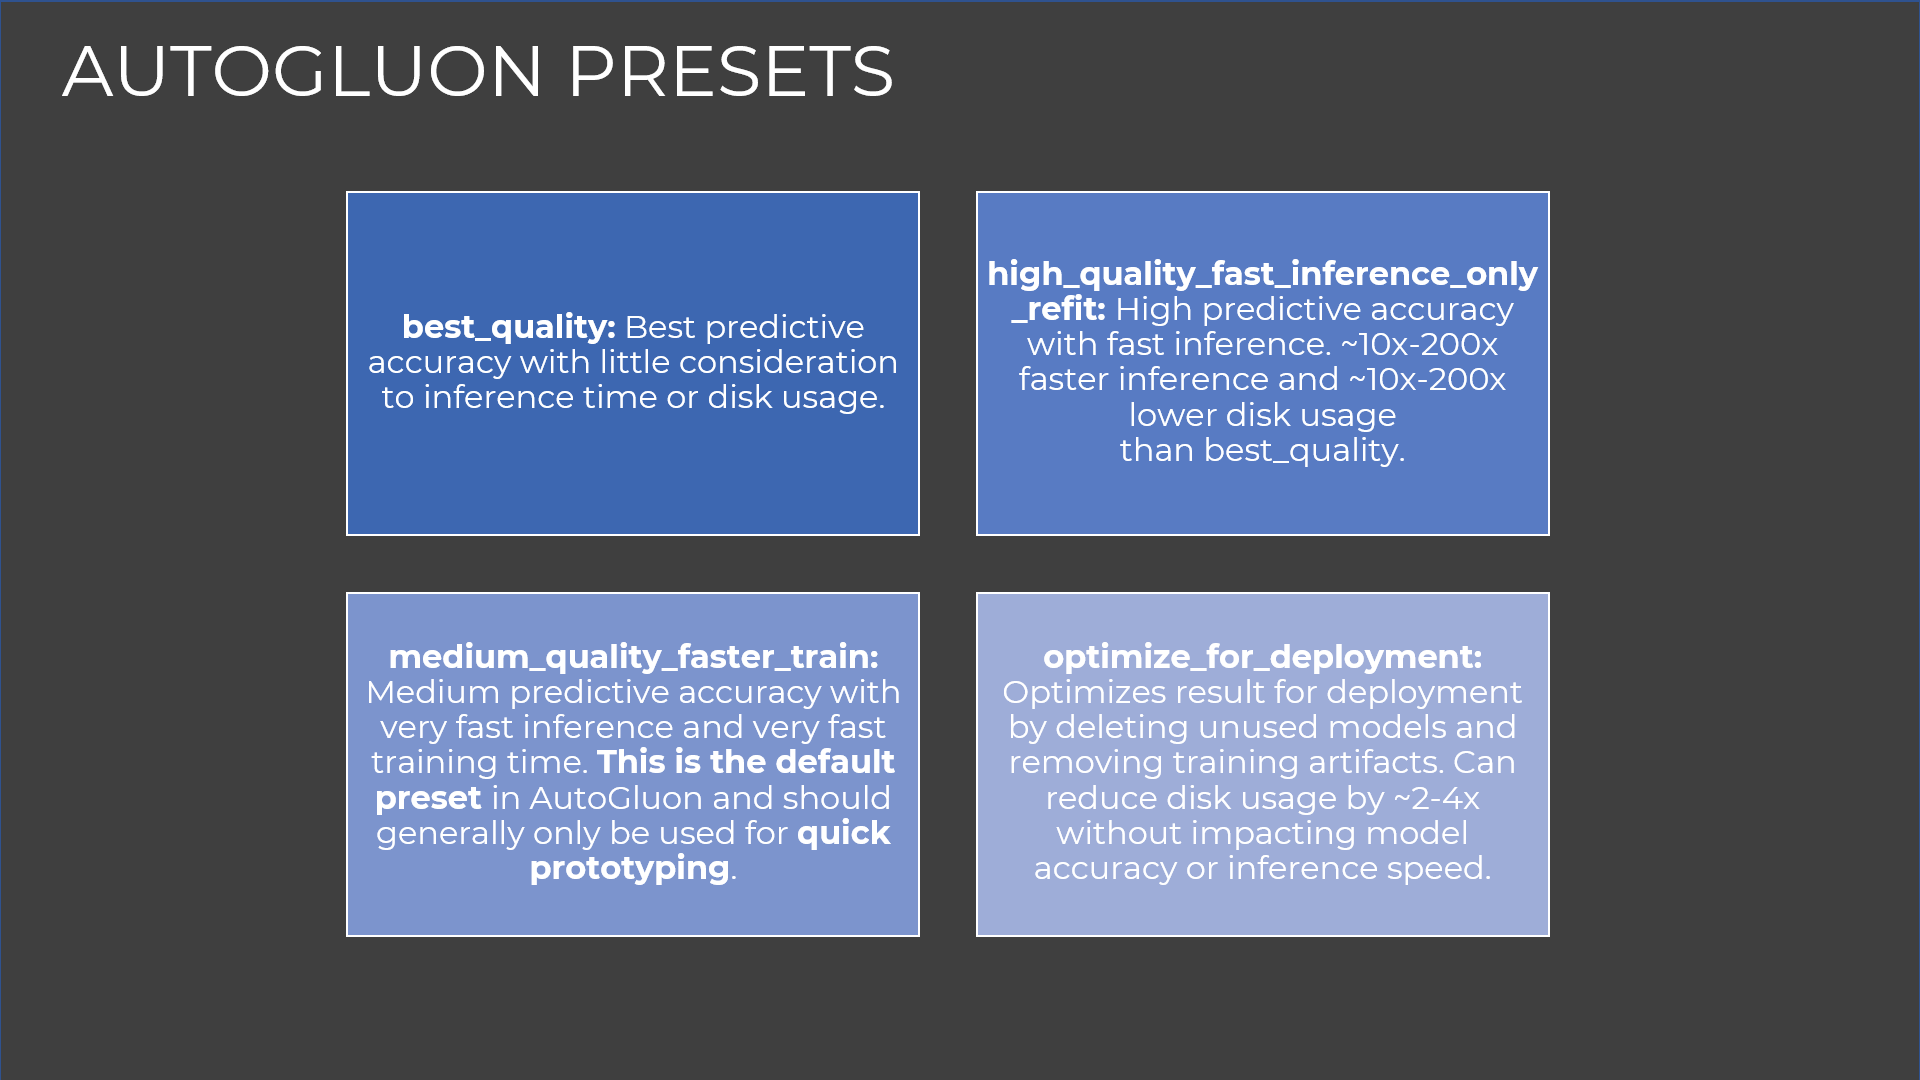

# TASK #5: TRAIN VISION MODELS USING AWS AUTOGLUON

In [10]:
time_limit = 50 * 60 # 50 mins

# Predictors built into AutoGluon such that a single call to fit() can produce high-quality trained models for tabular, image, or text data
# AutoGluon ImagePredictor works for predicting image category
# Check out the documentation here: https://auto.gluon.ai/stable/api/autogluon.task.html#autogluon.vision.ImagePredictor
predictor = ImagePredictor(problem_type = 'multiclass', eval_metric = 'accuracy', verbosity = 2)

# since the original dataset does not provide validation split, the `fit` function splits it randomly
# Specify tuning_data for validation which is data reserved for tuning processes such as early stopping and hyperparameter tuning.
# validation dataset should be in the same format as train_data. 
# Note that the final holdout testing dataset is totally separate and has never been seen by the model during training! 
predictor.fit(training_data, tuning_data = None, time_limit = time_limit, hyperparameters = {'epochs': 10})  

Reset labels to [0, 1, 2, 3]
Randomly split train_data into train[478]/validation[54] splits.
No GPU detected/allowed, using most conservative search space.
Starting fit without HPO
modified configs(<old> != <new>): {
root.img_cls.model   resnet101 != resnet18
root.misc.num_workers 4 != 2
root.misc.seed       42 != 438
root.train.early_stop_patience -1 != 10
root.train.early_stop_max_value 1.0 != inf
root.train.epochs    200 != 10
root.train.early_stop_baseline 0.0 != -inf
root.train.batch_size 32 != 16
root.gpus            (0,) != ()
}
Saved config to C:\Users\Administrator\Desktop\Notebook\3500c103\.trial_0\config.yaml
Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to C:\Users\Administrator/.cache\torch\hub\checkpoints\resnet18-5c106cde.pth
Model resnet18 created, param count:                                         11178564
AMP not enabled. Training in float32.
Disable EMA as it is not supported for now.
Start training from [Epoch 0]
[Epoch 0] training: acc

In [11]:
fit_result = predictor.fit_summary()

In [12]:
fit_result['train_acc']

0.7607758620689655

In [13]:
fit_result = predictor.fit_summary()
print('Top-1 train acc: %.3f, val acc: %.3f' %(fit_result['train_acc'], fit_result['valid_acc']))

Top-1 train acc: 0.761, val acc: 0.778


# TASK #6: EVALUATE TRAINED MODEL PERFORMANCE

In [14]:
test_dataset = ImageDataset.from_folder('./Lung_Disease_AI/test')
test_dataset

,image,label
0,C:\Users\Administrator\Desktop\Notebook\Lung_D...,0
1,C:\Users\Administrator\Desktop\Notebook\Lung_D...,0
2,C:\Users\Administrator\Desktop\Notebook\Lung_D...,0
3,C:\Users\Administrator\Desktop\Notebook\Lung_D...,0
4,C:\Users\Administrator\Desktop\Notebook\Lung_D...,0
5,C:\Users\Administrator\Desktop\Notebook\Lung_D...,0
6,C:\Users\Administrator\Desktop\Notebook\Lung_D...,0
7,C:\Users\Administrator\Desktop\Notebook\Lung_D...,0
8,C:\Users\Administrator\Desktop\Notebook\Lung_D...,0
9,C:\Users\Administrator\Desktop\Notebook\Lung_D...,0


In [15]:
pred = predictor.predict(test_dataset)
print(pred)

0     1
1     0
2     1
3     0
4     0
5     1
6     0
7     1
8     1
9     2
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    2
21    2
22    2
23    2
24    2
25    0
26    1
27    1
28    1
29    0
30    3
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
Name: label, dtype: int64


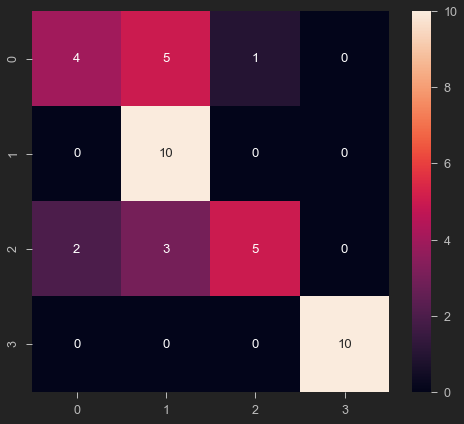

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset['label'], pred)
sns.heatmap(cm, annot = True)

**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
- **Plot the classification report**
- **Randomly select samples images to display, print the ground truth vs. predicted labels**

# FINAL CAPSTONE PROJECT

**Using Fashion Data available in the Guided project package. Please complete the following tasks:** 
- **1. Import Fashion Class dataset**
- **2. Perform basic data exploration and perform data sanity check**
- **3. Train a vision deep neural network model using AWS Autogluon**
- **4. Evaluate trained model performance by plotting confusion matrix and classification report and comment on the results** 

# PRACTICE OPPORTUNITY SOLUTIONS

**PRACTICE OPPORTUNITY #1 SOLUTION:**
- **Create a grid containing 10x10 images** 

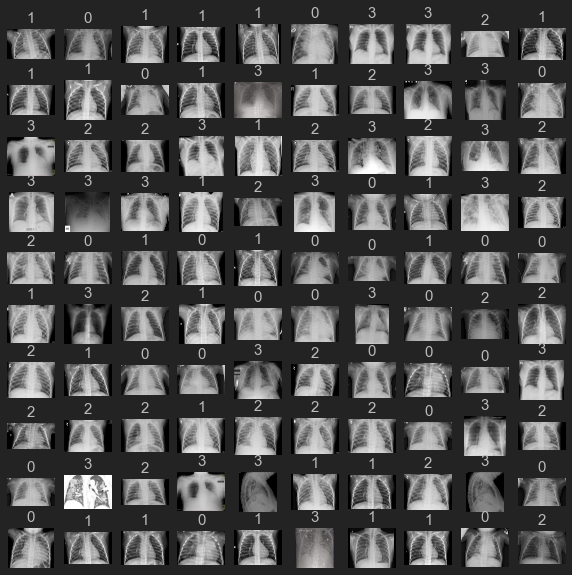

In [17]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array


n_training = len(training_data) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow(cv2.imread(training_data['image'][index]))
    axes[i].set_title(training_data['label'][index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)



**PRACTICE OPPORTUNITY #2 SOLUTION:**
- **Plot the classification report**
- **Randomly select samples images to display, print the ground truth vs. predicted labels**

In [18]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset['label'], pred))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        10
           1       0.56      1.00      0.71        10
           2       0.83      0.50      0.62        10
           3       1.00      1.00      1.00        10

    accuracy                           0.73        40
   macro avg       0.76      0.72      0.71        40
weighted avg       0.76      0.72      0.71        40



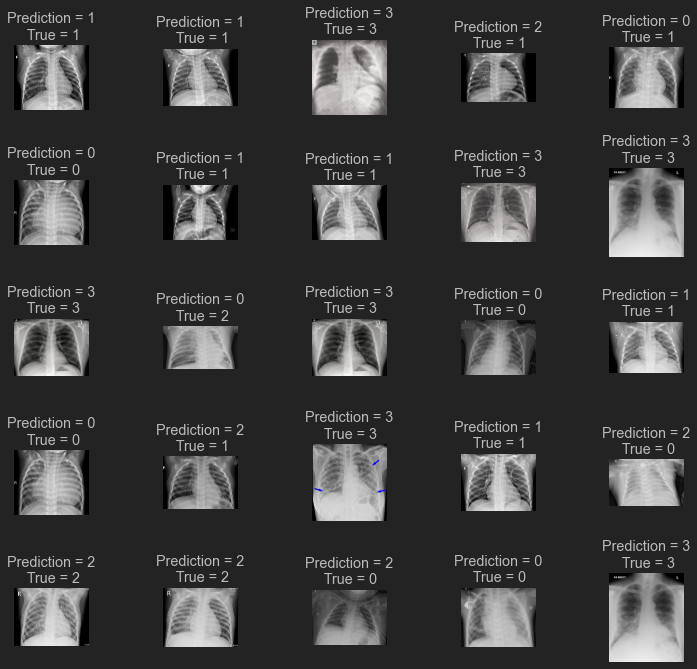

In [19]:
n_testing = len(test_dataset) # get the length of the training dataset
n_testing

L = 5
W = 5


n_testing = len(test_dataset) # get the length of the training dataset


fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    
    # Select a random number
    index = np.random.randint(0, n_testing)
    axes[i].imshow(cv2.imread(test_dataset['image'][index]))
    axes[i].set_title('Prediction = {}\n True = {}'.format(test_dataset['label'][index], pred[index]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# FINAL CAPSTONE PROJECT SOLUTION

In [20]:
from autogluon.vision import ImagePredictor, ImageDataset
training_data = ImageDataset.from_folder('./Fashion_Data/Fashion Training')
training_data

,image,label
0,C:\Users\Administrator\Desktop\Notebook\Fashio...,0
1,C:\Users\Administrator\Desktop\Notebook\Fashio...,0
2,C:\Users\Administrator\Desktop\Notebook\Fashio...,0
3,C:\Users\Administrator\Desktop\Notebook\Fashio...,0
4,C:\Users\Administrator\Desktop\Notebook\Fashio...,0
...,...,...
795,C:\Users\Administrator\Desktop\Notebook\Fashio...,9
796,C:\Users\Administrator\Desktop\Notebook\Fashio...,9
797,C:\Users\Administrator\Desktop\Notebook\Fashio...,9
798,C:\Users\Administrator\Desktop\Notebook\Fashio...,9


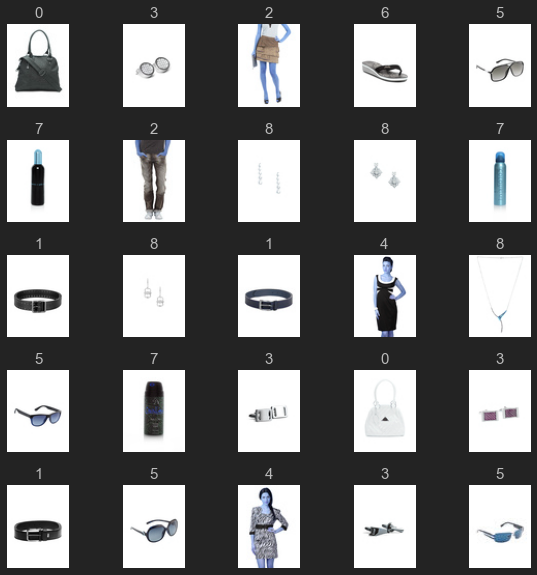

In [21]:
import random
i = random.randint(0, len(training_data))
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array


n_training = len(training_data) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow(cv2.imread(training_data['image'][index]))
    axes[i].set_title(training_data['label'][index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


In [22]:
time_limit = 50 * 60 # 50 mins

# Predictors built into AutoGluon such that a single call to fit() can produce high-quality trained models for tabular, image, or text data
# AutoGluon ImagePredictor works for predicting image category
# Check out the documentation here: https://auto.gluon.ai/stable/api/autogluon.task.html#autogluon.vision.ImagePredictor
predictor = ImagePredictor(problem_type = 'multiclass', eval_metric = 'accuracy', verbosity = 2)

# since the original dataset does not provide validation split, the `fit` function splits it randomly
# Specify tuning_data for validation which is data reserved for tuning processes such as early stopping and hyperparameter tuning.
# validation dataset should be in the same format as train_data. 
# Note that the final holdout testing dataset is totally separate and has never been seen by the model during training! 
predictor.fit(training_data, tuning_data = None, time_limit = time_limit, hyperparameters = {'epochs': 3})  

Reset labels to [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Randomly split train_data into train[720]/validation[80] splits.
No GPU detected/allowed, using most conservative search space.
Starting fit without HPO
modified configs(<old> != <new>): {
root.img_cls.model   resnet101 != resnet18
root.misc.num_workers 4 != 2
root.misc.seed       42 != 295
root.train.early_stop_patience -1 != 10
root.train.early_stop_max_value 1.0 != inf
root.train.epochs    200 != 3
root.train.early_stop_baseline 0.0 != -inf
root.train.batch_size 32 != 16
root.gpus            (0,) != ()
}
Saved config to C:\Users\Administrator\Desktop\Notebook\f0915191\.trial_0\config.yaml
Model resnet18 created, param count:                                         11181642
AMP not enabled. Training in float32.
Disable EMA as it is not supported for now.
Start training from [Epoch 0]
[Epoch 0] training: accuracy=0.126389
[Epoch 0] speed: 2 samples/sec	time cost: 252.698782
[Epoch 0] validation: top1=0.275000 top5=0.737500
[Epoch 0] Curre

In [23]:
fit_result = predictor.fit_summary()
print('Top-1 train acc: %.3f, val acc: %.3f' %(fit_result['train_acc'], fit_result['valid_acc']))  

Top-1 train acc: 0.626, val acc: 0.825


In [24]:
test_dataset = ImageDataset.from_folder('./Fashion_Data/Fashion Testing')
test_dataset

,image,label
0,C:\Users\Administrator\Desktop\Notebook\Fashio...,0
1,C:\Users\Administrator\Desktop\Notebook\Fashio...,0
2,C:\Users\Administrator\Desktop\Notebook\Fashio...,0
3,C:\Users\Administrator\Desktop\Notebook\Fashio...,0
4,C:\Users\Administrator\Desktop\Notebook\Fashio...,0
...,...,...
195,C:\Users\Administrator\Desktop\Notebook\Fashio...,9
196,C:\Users\Administrator\Desktop\Notebook\Fashio...,9
197,C:\Users\Administrator\Desktop\Notebook\Fashio...,9
198,C:\Users\Administrator\Desktop\Notebook\Fashio...,9


In [ ]:
pred = predictor.predict(test_dataset)
print(pred)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset['label'], pred)
sns.heatmap(cm, annot = True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset['label'], pred))